# Предсказание оттока клиентов телеком-оператора "ТЕЛЕДОМ"

---

**БИЗНЕС-КОНТЕКСТ**

Оператор связи «ТелеДом» сталкивается с оттоком клиентов и хочет проактивно бороться с этой проблемой. Компания планирует предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Для этого необходима модель машинного обучения, которая будет заранее выявлять таких клиентов.

---

**ЦЕЛЬ ПРОЕКТА**

Создать модель машинного обучения для предсказания оттока клиентов (churn prediction) с метрикой ROC-AUC не менее 0.85 на тестовой выборке.

---

**ЗАДАЧИ ПРОЕКТА**

1. **Загрузка и первичный анализ данных**
   - Подключение к базе данных SQLite
   - Загрузка 4 таблиц с информацией о клиентах
   - Проверка структуры и качества данных

2. **Исследовательский анализ (EDA)**
   - Анализ распределения признаков
   - Выявление пропусков и аномалий
   - Изучение корреляций и зависимостей

3. **Подготовка данных**
   - Объединение таблиц по customerID
   - Обработка пропусков
   - Создание целевой переменной на основе EndDate
   - Feature Engineering (создание новых признаков)

4. **Построение и оценка моделей**
   - Обучение нескольких классов моделей (деревья, бустинг)
   - Подбор гиперпараметров
   - Кросс-валидация
   - Выбор лучшей модели

5. **Тестирование и интерпретация**
   - Оценка качества на тестовой выборке
   - Анализ важности признаков
   - Формулировка бизнес-рекомендаций

---

**ОПИСАНИЕ ДАННЫХ**

Данные хранятся в SQLite базе данных (файл ds-plus-final.db) и состоят из 4 таблиц:

**1. Таблица contract** - информация о договорах (7043 записи)
- `customerID` - уникальный ID абонента
- `BeginDate` - дата начала действия договора
- `EndDate` - дата окончания действия договора (или "No" для действующих)
- `Type` - тип оплаты (Month-to-month, One year, Two year)
- `PaperlessBilling` - электронный расчётный лист (Yes/No)
- `PaymentMethod` - способ платежа (Electronic check, Mailed check, Bank transfer, Credit card)
- `MonthlyCharges` - расходы за месяц (в долларах)
- `TotalCharges` - общие расходы абонента (в долларах)

**2. Таблица personal** - персональные данные клиентов (7043 записи)
- `customerID` - уникальный ID пользователя
- `gender` - пол (Male/Female)
- `SeniorCitizen` - является ли абонент пенсионером (0/1)
- `Partner` - есть ли супруг/супруга (Yes/No)
- `Dependents` - есть ли дети (Yes/No)

**3. Таблица internet** - информация об интернет-услугах (5517 записей)
- `customerID` - уникальный ID пользователя
- `InternetService` - тип подключения (DSL, Fiber optic)
- `OnlineSecurity` - блокировка опасных сайтов (Yes/No)
- `OnlineBackup` - облачное хранилище (Yes/No)
- `DeviceProtection` - антивирус (Yes/No)
- `TechSupport` - выделенная линия техподдержки (Yes/No)
- `StreamingTV` - стриминговое телевидение (Yes/No)
- `StreamingMovies` - каталог фильмов (Yes/No)

**4. Таблица phone** - информация об услугах телефонии (6361 запись)
- `customerID` (или CustomerId) - уникальный ID пользователя
- `MultipleLines` - подключение к нескольким линиям (Yes/No)

**Актуальность данных:** информация о договорах актуальна на 1 февраля 2020 года.

**Целевая переменная:** формируется на основе поля EndDate
- 0 - клиент действующий (EndDate = NaT или "No")
- 1 - клиент ушел (EndDate заполнена)

---

**ПЛАН РАБОТЫ**

**Этап 1: Подготовка окружения и загрузка данных**
- Настройка библиотек и констант
- Загрузка SQLite базы
- Первичная проверка структуры БД

**Этап 2: Исследовательский анализ каждой таблицы**
- Анализ типов данных
- Поиск пропусков и аномалий
- Понимание бизнес-логики каждого поля

**Этап 3: Объединение таблиц и создание датасета**
- Проверка связей между таблицами
- Создание единой таблицы
- Формирование целевой переменной

**Этап 4: Feature Engineering**
- Создание новых признаков (длительность контракта, количество услуг)
- Корреляционный анализ
- Отбор признаков

**Этап 5: Моделирование**
- Обучение базовых моделей (Decision Tree, Random Forest)
- Обучение бустингов (XGBoost, CatBoost, LightGBM)
- Подбор гиперпараметров (GridSearchCV, RandomizedSearchCV)
- Выбор лучшей модели

**Этап 6: Анализ результатов**
- Тестирование на отложенной выборке
- Построение матрицы ошибок
- Анализ важности признаков
- Бизнес-рекомендации

---

**МЕТРИКИ КАЧЕСТВА**

- **Основная метрика:** ROC-AUC (целевое значение ≥ 0.85)
- **Дополнительные метрики:** Accuracy, Precision, Recall
- **Сравнение:** с константной моделью (baseline)

---

**КОНСТАНТЫ ПРОЕКТА**

- `RANDOM_STATE = 51125` - для воспроизводимости результатов
- `TEST_SIZE = 0.25` - размер тестовой выборки
- `DB_PATH = 'ds-plus-final.db'` - путь к базе данных

---

**ОЖИДАЕМЫЕ РЕЗУЛЬТАТЫ**

1. Рабочая модель с ROC-AUC ≥ 0.85
2. Список ключевых факторов, влияющих на отток
3. Рекомендации для программы удержания клиентов
4. Интерпретация модели для бизнеса
5. План по улучшению модели

---

# Этап 1: Подготовка окружения и загрузка данных

- Настройка библиотек и констант
- Загрузка SQLite базы
- Первичная проверка структуры БД

## Импорты

- Импортирую необходимые библиотеки для работы с данными, базой данных, 
визуализацией и моделями.
- Установлю константы проекта.

In [44]:
# основные библиотеки для работы с данными
import pandas as pd
import numpy as np
import os

# работа с базой данных
from sqlalchemy import create_engine

# визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# корреляционный анализ
import phik

# препроцессинг данных
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# разделение данных
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

# модели машинного обучения
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# метрики качества
from sklearn.metrics import (
    roc_auc_score, 
    accuracy_score, 
    confusion_matrix,
    precision_recall_curve, 
    average_precision_score
)

# настройки
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# константы проекта
RANDOM_STATE = 51125
DB_PATH = 'ds-plus-final.db'

print("библиотеки загружены")
print(f"RANDOM_STATE: {RANDOM_STATE}")
print(f"DB_PATH: {DB_PATH}")

библиотеки загружены
RANDOM_STATE: 51125
DB_PATH: ds-plus-final.db


## Загрузка БД

- Проверю наличие файла базы данных и создам подключение к SQLite.
- Выведу информацию о размере файла.

In [2]:
# проверка наличия файла бд
if os.path.exists(DB_PATH):
    file_size = os.path.getsize(DB_PATH) / 1024 / 1024
    print(f"база данных найдена: {DB_PATH}")
    print(f"размер файла: {file_size:.2f} мб")
else:
    print(f"✗ база данных не найдена: {DB_PATH}")
    print("\nдля загрузки выполните:")
    print("!wget https://code.s3.yandex.net/data-scientist/ds-plus-final.db")

# создание подключения
engine = create_engine(f'sqlite:///{DB_PATH}', echo=False)
print(f"\nподключение создано")

база данных найдена: ds-plus-final.db
размер файла: 3.42 мб

подключение создано


## Первичное исследование и предобработка

Что нужно выяснить:

- Список таблиц в БД - должно быть ровно 4 таблицы согласно описанию
- Размеры таблиц - сколько строк в каждой таблице
- Схема данных - какие колонки в каждой таблице
- Ключевое поле - проверить, что customerID есть во всех таблицах

Что нужно выполнить:
- Анализ типов данных
- Поиск пропусков и аномалий
- Исправление ошибок

- Получу список всех таблиц в базе данных.
- Это поможет убедиться, что все нужные таблицы присутствуют.

In [3]:
# получение списка таблиц
query = """
SELECT name 
FROM sqlite_master 
WHERE type='table';
"""

tables_df = pd.read_sql(query, engine)
print(f"найдено таблиц: {len(tables_df)}")
print("\nсписок таблиц:")
print(tables_df)

найдено таблиц: 11

список таблиц:
              name
0         data_arc
1        data_bulk
2   data_bulk_time
3   data_wire_time
4         contract
5         personal
6            phone
7         internet
8         data_gas
9        data_temp
10       data_wire


- Загружу 4 основные таблицы из базы данных.

In [4]:
# загрузка таблиц
contract = pd.read_sql('SELECT * FROM contract', engine)
personal = pd.read_sql('SELECT * FROM personal', engine)
internet = pd.read_sql('SELECT * FROM internet', engine)
phone = pd.read_sql('SELECT * FROM phone', engine)

# закрытие соединения
engine.dispose()

print("таблицы загружены")

таблицы загружены


- Проверю размеры загруженных таблиц и посмотрю на первые строки каждой.

In [5]:
# размеры таблиц
print("размеры таблиц:")
print(f"contract: {contract.shape}")
print(f"personal: {personal.shape}")
print(f"internet: {internet.shape}")
print(f"phone: {phone.shape}")

print("\n--- contract ---")
display(contract.head())

print("\n--- personal ---")
display(personal.head())

print("\n--- internet ---")
display(internet.head())

print("\n--- phone ---")
display(phone.head())

размеры таблиц:
contract: (7043, 8)
personal: (7043, 5)
internet: (5517, 8)
phone: (6361, 2)

--- contract ---


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.3,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.7,353.5



--- personal ---


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



--- internet ---


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



--- phone ---


,CustomerId,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Размеры таблиц различаются:
- contract и personal: по 7043 строки (одинаковое количество)
- internet: 5517 строк
- phone: 6361 строка

Замечания:
- В таблице phone поле называется "CustomerId" (с заглавной I)
- В contract поле EndDate содержит "No" вместо даты для действующих контрактов
- Все данные пока загружены как object

- Проверю типы данных и наличие пропусков в таблице contract.

In [6]:
# информация о contract
print("--- типы данных contract ---")
print(contract.dtypes)

print("\n--- пропуски contract ---")
print(contract.isnull().sum())

print("\n--- дубликаты contract ---")
print(f"дубликатов: {contract.duplicated().sum()}")

print("\n" + "="*50)

# информация о internet
print("--- типы данных internet ---")
print(internet.dtypes)

print("\n--- пропуски internet ---")
print(internet.isnull().sum())

print("\n--- дубликаты internet ---")
print(f"дубликатов: {internet.duplicated().sum()}")

print("\n" + "="*50)

# информация о phone
print("\n--- типы данных phone ---")
print(phone.dtypes)

print("\n--- пропуски phone ---")
print(phone.isnull().sum())

print("\n--- дубликаты phone ---")
print(f"дубликатов: {phone.duplicated().sum()}")

--- типы данных contract ---
customerID          object
BeginDate           object
EndDate             object
Type                object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
dtype: object

--- пропуски contract ---
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

--- дубликаты contract ---
дубликатов: 0

--- типы данных internet ---
customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object

--- пропуски internet ---
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

--- ду

- Пропусков и дубликатов нет ни в одной таблице.
- Все данные загружены как object, потребуется преобразование типов.
- В таблице phone поле действительно называется CustomerId.

- Проверю количество уникальных значений в каждом столбце contract.

In [7]:
# уникальные значения
print("количество уникальных значений в contract:")
print(contract.nunique())

print("\nуникальные значения EndDate (первые 10):")
contract['EndDate'].value_counts().head(10)

количество уникальных значений в contract:
customerID          7043
BeginDate             77
EndDate               67
Type                   3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6658
dtype: int64

уникальные значения EndDate (первые 10):


EndDate
No            5942
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
2019-10-01      31
2019-11-01      30
2019-03-01      28
2019-01-01      28
2019-06-01      28
Name: count, dtype: int64

- Преобразую BeginDate и EndDate в datetime, MonthlyCharges и TotalCharges в числовой формат.
- EndDate содержит "No" для действующих клиентов, заменю на NaT.

In [8]:
# преобразование дат
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')
contract['EndDate'] = contract['EndDate'].replace('No', np.nan)
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')

# преобразование числовых признаков
contract['MonthlyCharges'] = pd.to_numeric(contract['MonthlyCharges'], errors='coerce')
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

print("типы данных после преобразования:")
print(contract.dtypes)

print("\nпропуски после преобразования:")
contract.isnull().sum()

типы данных после преобразования:
customerID                  object
BeginDate           datetime64[ns]
EndDate             datetime64[ns]
Type                        object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
dtype: object

пропуски после преобразования:


customerID             0
BeginDate              0
EndDate             5942
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
dtype: int64

- Проверю количество уникальных значений в personal, internet и phone.

In [9]:
print("уникальные значения в personal:")
print(personal.nunique())

print("\nуникальные значения в internet:")
print(internet.nunique())

print("\nуникальные значения в phone:")
print(phone.nunique())

уникальные значения в personal:
customerID       7043
gender              2
SeniorCitizen       2
Partner             2
Dependents          2
dtype: int64

уникальные значения в internet:
customerID          5517
InternetService        2
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
dtype: int64

уникальные значения в phone:
CustomerId       6361
MultipleLines       2
dtype: int64


# Этап 2: Исследовательский анализ каждой таблицы

- Понимание бизнес-логики каждого поля

## Анализ Contract

- Посмотрю на статистику числовых признаков в contract.
- Проверю наличие выбросов и распределение значений.

In [10]:
# статистика числовых признаков
print("статистика по MonthlyCharges и TotalCharges:")
display(contract[['MonthlyCharges', 'TotalCharges']].describe())

# строки с пропусками в TotalCharges
print(f"\nстрок с пропусками в TotalCharges: {contract['TotalCharges'].isnull().sum()}")

статистика по MonthlyCharges и TotalCharges:


,MonthlyCharges,TotalCharges
count,7043.000000,7032.000000
mean,64.761692,2118.621822
std,30.090047,2112.736199
min,18.250000,19.050000
25%,35.500000,439.745000
50%,70.350000,1345.275000
75%,89.850000,3239.317500
max,118.750000,9221.380000



строк с пропусками в TotalCharges: 11


- В contract обнаружено 11 пропусков в TotalCharges - эти строки потребуется удалить.
- MonthlyCharges варьируются от 18.25 до 118.75, среднее значение 64.76.
- TotalCharges имеют большой разброс от 19.05 до 9221.38.

- Проверю распределение категориальных признаков в contract.

In [11]:
# категориальные признаки
cat_cols = ['Type', 'PaperlessBilling', 'PaymentMethod']

for col in cat_cols:
    print(f"\n{col}:")
    print(contract[col].value_counts())


Type:
Type
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

PaperlessBilling:
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

PaymentMethod:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


- Преобладают месячные контракты (55%), электронные расчетные листы (59%).

- Посмотрю на распределение EndDate - основу для целевой переменной.
- 5942 клиента с пропусками в EndDate - это действующие клиенты.

In [12]:
# распределение EndDate
print("распределение EndDate:")
print(f"действующих клиентов (NaT): {contract['EndDate'].isnull().sum()}")
print(f"ушедших клиентов: {contract['EndDate'].notnull().sum()}")

# доля оттока
churn_rate = contract['EndDate'].notnull().sum() / len(contract)
print(f"\nдоля оттока: {churn_rate:.2%}")

распределение EndDate:
действующих клиентов (NaT): 5942
ушедших клиентов: 1101

доля оттока: 15.63%


- Дисбаланс классов: 84.37% действующих клиентов против 15.63% ушедших.

## Анализ personal

- Проверю распределение признаков в таблице personal.

In [13]:
# распределение признаков personal
print("распределение признаков в personal:")
for col in personal.columns:
    if col != 'customerID':
        print(f"\n{col}:")
        print(personal[col].value_counts())

распределение признаков в personal:

gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


- Распределение примерно равномерное по полу и наличию партнера (50/50).
- Большинство клиентов не пенсионеры (84%) и не имеют детей (70%).

## Анализ Internet

- Проверю распределение признаков в таблице internet.

In [14]:
# распределение признаков internet
print("распределение признаков в internet:")
for col in internet.columns:
    if col != 'customerID':
        print(f"\n{col}:")
        print(internet[col].value_counts())

распределение признаков в internet:

InternetService:
InternetService
Fiber optic    3096
DSL            2421
Name: count, dtype: int64

OnlineSecurity:
OnlineSecurity
No     3498
Yes    2019
Name: count, dtype: int64

OnlineBackup:
OnlineBackup
No     3088
Yes    2429
Name: count, dtype: int64

DeviceProtection:
DeviceProtection
No     3095
Yes    2422
Name: count, dtype: int64

TechSupport:
TechSupport
No     3473
Yes    2044
Name: count, dtype: int64

StreamingTV:
StreamingTV
No     2810
Yes    2707
Name: count, dtype: int64

StreamingMovies:
StreamingMovies
No     2785
Yes    2732
Name: count, dtype: int64


- Из 7043 клиентов только 5517 имеют интернет-услуги.
- Fiber optic популярнее DSL (56% vs 44%).
- По дополнительным услугам большинство выбирает "No", кроме стриминга (примерно 50/50).

## Анализ Phone

- Проверю распределение MultipleLines в phone.
- Переименую CustomerId в customerID для единообразия.

In [15]:
# распределение в phone
print("распределение MultipleLines в phone:")
print(phone['MultipleLines'].value_counts())

# исправление названия поля
phone = phone.rename(columns={'CustomerId': 'customerID'})
print(f"\nпереименовано: CustomerId -> customerID")
print(f"столбцы phone: {phone.columns.tolist()}")

распределение MultipleLines в phone:
MultipleLines
No     3390
Yes    2971
Name: count, dtype: int64

переименовано: CustomerId -> customerID
столбцы phone: ['customerID', 'MultipleLines']


- Из 7043 клиентов 6361 имеют телефонные услуги.
- Распределение MultipleLines: 53% No, 47% Yes.
- Поле успешно переименовано для единообразия при объединении таблиц.

# Этап 3: Объединение таблиц и создание датасета

- Проверка связей между таблицами
- Создание единой таблицы
- Формирование целевой переменной

- Проверю уникальность customerID во всех таблицах перед объединением.

In [16]:
# проверка уникальности customerID
print("уникальность customerID в таблицах:")
print(f"contract: всего {len(contract)}, уникальных {contract['customerID'].nunique()}")
print(f"personal: всего {len(personal)}, уникальных {personal['customerID'].nunique()}")
print(f"internet: всего {len(internet)}, уникальных {internet['customerID'].nunique()}")
print(f"phone: всего {len(phone)}, уникальных {phone['customerID'].nunique()}")

уникальность customerID в таблицах:
contract: всего 7043, уникальных 7043
personal: всего 7043, уникальных 7043
internet: всего 5517, уникальных 5517
phone: всего 6361, уникальных 6361


- Все customerID уникальны в каждой таблице - дубликатов нет.
- Не все клиенты имеют интернет (5517 из 7043) и телефон (6361 из 7043).

- Объединю все таблицы по customerID с помощью left join от contract.
- Таким образом сохраню всех клиентов из основной таблицы.

In [17]:
# объединение таблиц
df = contract.merge(personal, on='customerID', how='left') \
             .merge(internet, on='customerID', how='left') \
             .merge(phone, on='customerID', how='left')

print(f"размер объединенного датафрейма: {df.shape}")
print(f"\nпервые строки:")
df.head()

размер объединенного датафрейма: (7043, 20)

первые строки:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


- Объединение выполнено успешно - сохранены все 7043 клиента из contract.
- Используя left join, получили пропуски для клиентов без интернета и телефона.

- Проверю наличие пропусков в объединенной таблице.

In [18]:
# пропуски в объединенной таблице
print("пропуски в объединенном датафрейме:")
df.isnull().sum()

пропуски в объединенном датафрейме:


customerID             0
BeginDate              0
EndDate             5942
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

Пропуски в объединенной таблице:
- EndDate: 5942 (действующие клиенты - это норма)
- TotalCharges: 11 (ошибки данных - нужно удалить)
- InternetService и связанные: 1526 (клиенты без интернета)
- MultipleLines: 682 (клиенты без телефона)

- Удалю 11 строк с пропусками в TotalCharges.
- Это ошибки данных, которые нельзя корректно восстановить.

In [19]:
# удаление строк с пропусками в TotalCharges
df = df.dropna(subset=['TotalCharges']).reset_index(drop=True)

print(f"размер после удаления: {df.shape}")
print(f"пропусков в TotalCharges: {df['TotalCharges'].isnull().sum()}")

размер после удаления: (7032, 20)
пропусков в TotalCharges: 0


- Создам целевую переменную target на основе EndDate.
- 0 - клиент действующий (EndDate = NaT)
- 1 - клиент ушел (EndDate заполнена)

In [20]:
# создание целевой переменной
df['target'] = df['EndDate'].apply(lambda x: 0 if pd.isnull(x) else 1)

print("распределение целевой переменной:")
print(df['target'].value_counts())

print(f"\nдоля оттока: {df['target'].mean():.2%}")

распределение целевой переменной:
target
0    5931
1    1101
Name: count, dtype: int64

доля оттока: 15.66%


- Целевая переменная создана успешно.
- Дисбаланс классов: 84.34% действующих клиентов против 15.66% ушедших.
- Потребуется учесть при обучении модели (stratify при split).

- Заменю пропуски в категориальных признаках на 'No service'.
- Это отразит бизнес-логику: клиент не подключал эту услугу.

In [21]:
# замена пропусков в категориальных признаках
internet_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
phone_cols = ['MultipleLines']

for col in internet_cols + phone_cols:
    df[col] = df[col].fillna('No service')

print("пропуски после обработки:")
df.isnull().sum()

пропуски после обработки:


customerID             0
BeginDate              0
EndDate             5931
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
MultipleLines          0
target                 0
dtype: int64

- Все пропуски в категориальных признаках заменены на 'No service'.
- Остались только пропуски в EndDate (5931) - это действующие клиенты, так и должно быть.
- Данные готовы для создания новых признаков.

# Этап 4: Feature Engineering

- Создание новых признаков
- Подготовка данных к разделению и обучению

- Создам признак ContractDuration - длительность контракта в днях.
- Для действующих клиентов использую максимальную дату из EndDate (2020-02-01).

In [22]:
# максимальная дата в EndDate
max_end_date = df['EndDate'].max()
print(f"максимальная дата EndDate: {max_end_date}")

# заполнение пропусков в EndDate максимальной датой
df['EndDate_filled'] = df['EndDate'].fillna(max_end_date)

# расчет длительности контракта в днях
df['ContractDuration'] = (df['EndDate_filled'] - df['BeginDate']).dt.days

print(f"\nстатистика ContractDuration:")
display(df['ContractDuration'].describe())

# удаление временного столбца
df = df.drop('EndDate_filled', axis=1)

максимальная дата EndDate: 2020-01-01 00:00:00

статистика ContractDuration:


count    7032.000000
mean      873.814989
std       683.008735
min         0.000000
25%       245.000000
50%       730.000000
75%      1430.000000
max      2283.000000
Name: ContractDuration, dtype: float64

- Длительность контракта варьируется от 0 до 2283 дней.
- Медиана 730 дней (2 года) - это типичная длительность контракта.
- Признак может быть полезен для предсказания оттока.

- Создам признак NumberOfServices - количество подключенных дополнительных услуг.
- Учитываю 6 интернет-услуг: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies.

In [23]:
# список интернет-услуг для подсчета
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# подсчет количества услуг (значение 'Yes')
df['NumberOfServices'] = (df[service_cols] == 'Yes').sum(axis=1)

print("распределение NumberOfServices:")
print(df['NumberOfServices'].value_counts().sort_index())

распределение NumberOfServices:
NumberOfServices
0    2213
1     966
2    1033
3    1117
4     850
5     569
6     284
Name: count, dtype: int64


- Распределение количества услуг неравномерное.
- Наибольшая группа - клиенты без дополнительных услуг (2213).
- Небольшая часть клиентов использует все 6 услуг (284).

- Удалю customerID, BeginDate и EndDate - они не нужны для обучения модели.

In [24]:
# удаление ненужных столбцов
df = df.drop(['customerID', 'BeginDate', 'EndDate'], axis=1)

print(f"размер датафрейма: {df.shape}")
print(f"\nстолбцы датафрейма:")
print(df.columns.tolist())

размер датафрейма: (7032, 20)

столбцы датафрейма:
['Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'target', 'ContractDuration', 'NumberOfServices']


- Визуализирую распределение числовых признаков.
- Проверю наличие выбросов и форму распределения.

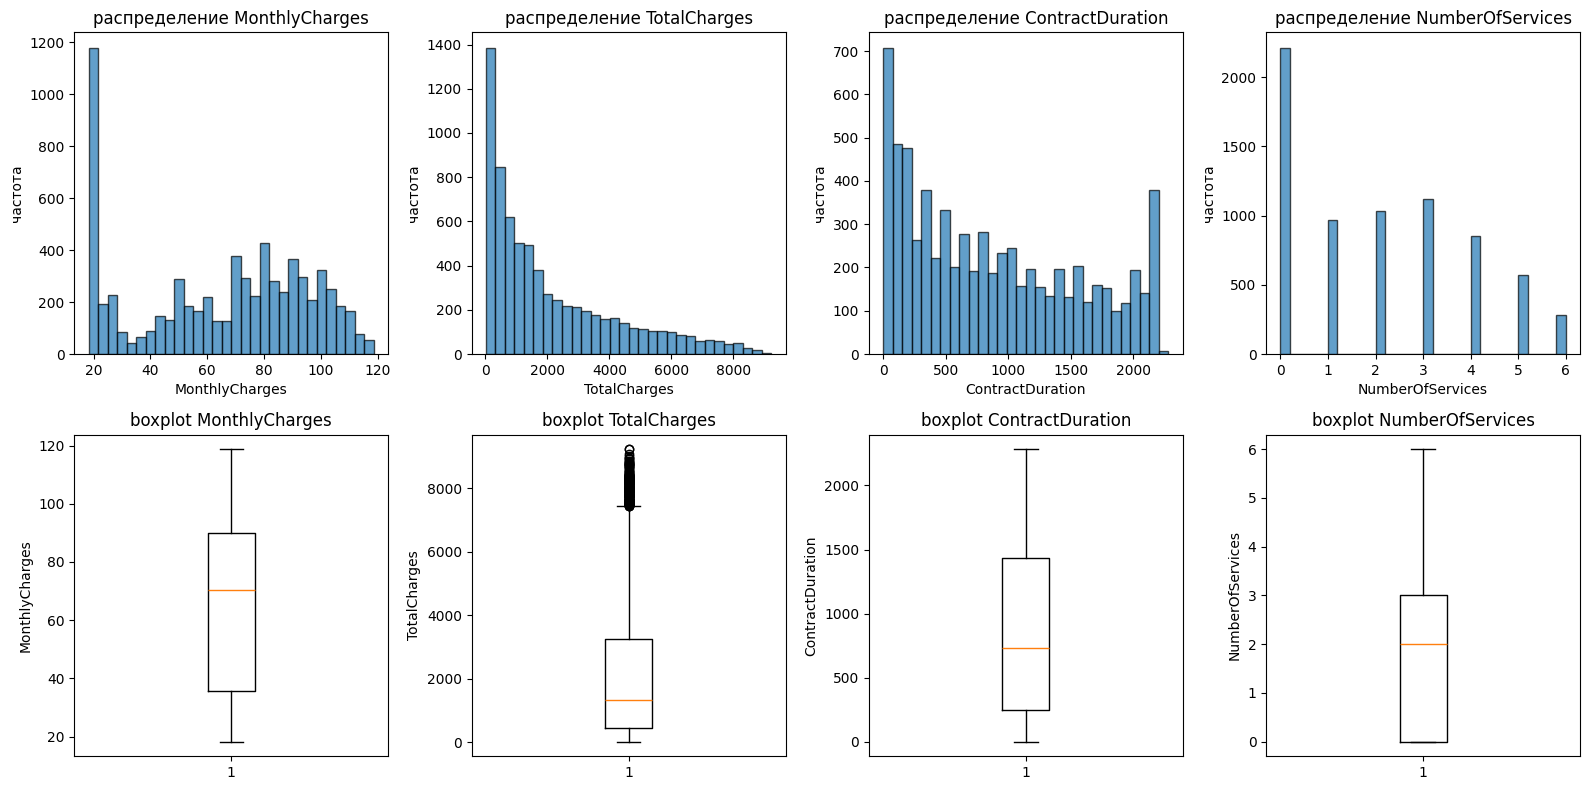

In [25]:
# визуализация числовых признаков
num_cols = ['MonthlyCharges', 'TotalCharges', 'ContractDuration', 'NumberOfServices']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    # гистограмма
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('частота')
    
    # boxplot
    axes[i+4].boxplot(df[col])
    axes[i+4].set_title(f'boxplot {col}')
    axes[i+4].set_ylabel(col)

plt.tight_layout()
plt.show()

- MonthlyCharges имеет неравномерное распределение без выбросов судя по боксплоту.
- TotalCharges сильно скошено вправо, есть выбросы (клиенты с большим стажем).
- ContractDuration имеет пик на 0 (новые клиенты), равномерное распределение далее и пик на ~2500.
- NumberOfServices - дискретное распределение, большинство имеет 0-3 услуги.

- Посмотрю на соотношение оттока по ключевым категориальным признакам.

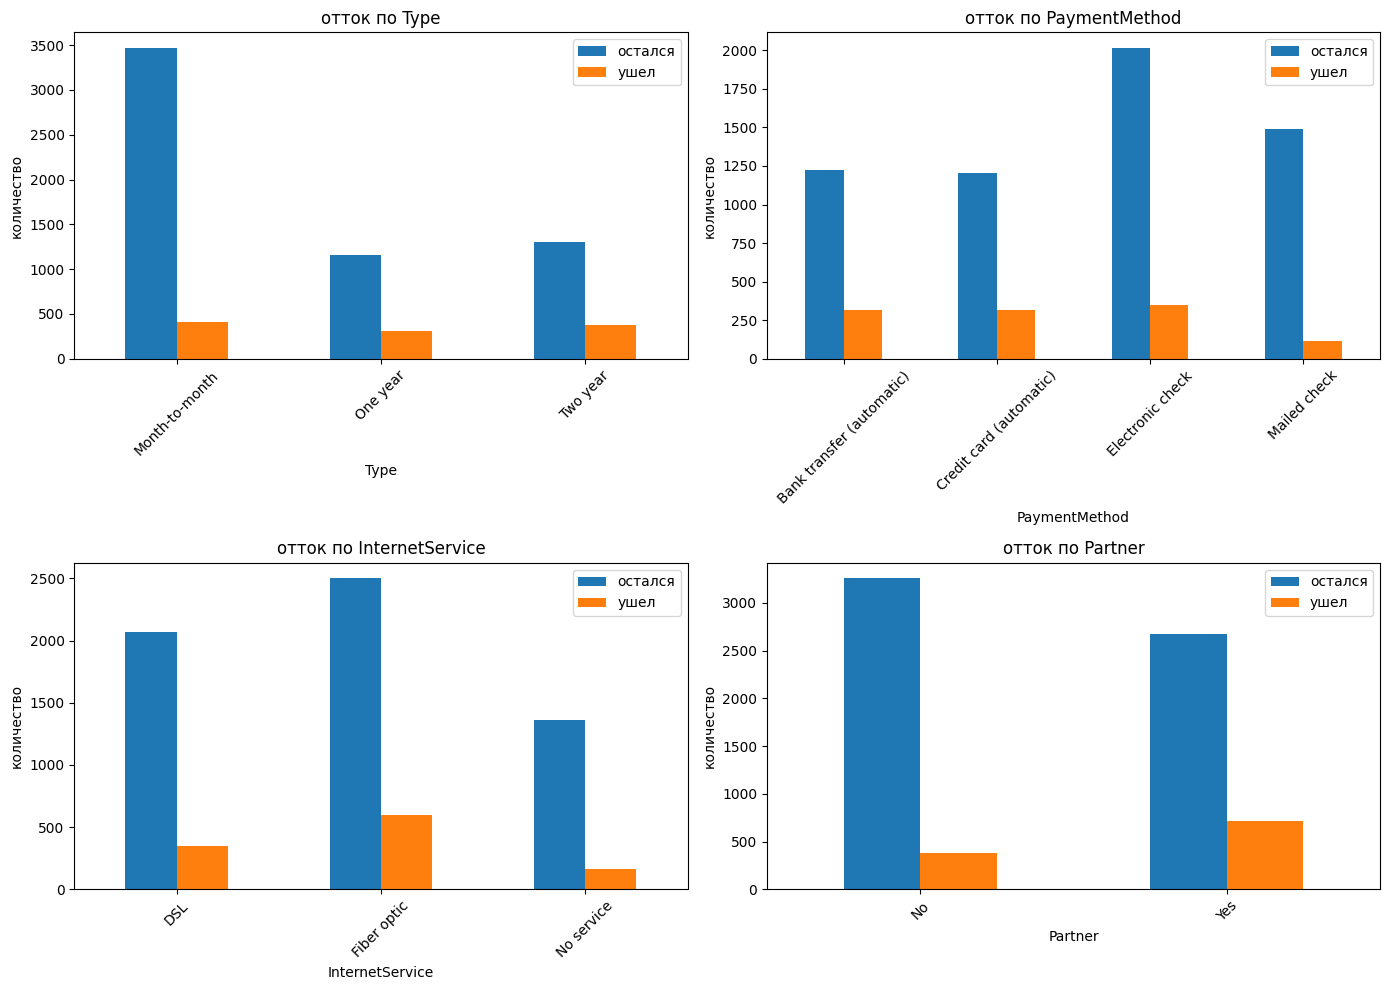

In [26]:
# ключевые категориальные признаки
key_cat_cols = ['Type', 'PaymentMethod', 'InternetService', 'Partner']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(key_cat_cols):
    df_grouped = df.groupby([col, 'target']).size().unstack()
    df_grouped.plot(kind='bar', stacked=False, ax=axes[i])
    axes[i].set_title(f'отток по {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('количество')
    axes[i].legend(['остался', 'ушел'])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- Месячные контракты (Month-to-month) имеют наибольший отток.
- Mailed check - самый безрисковый способ оплаты по оттоку.
- Клиенты с Fiber optic интернетом уходят чаще.
- Клиенты без партнера (Partner=No) менее склонны к оттоку.

- Построю матрицу корреляций phik для всех признаков.

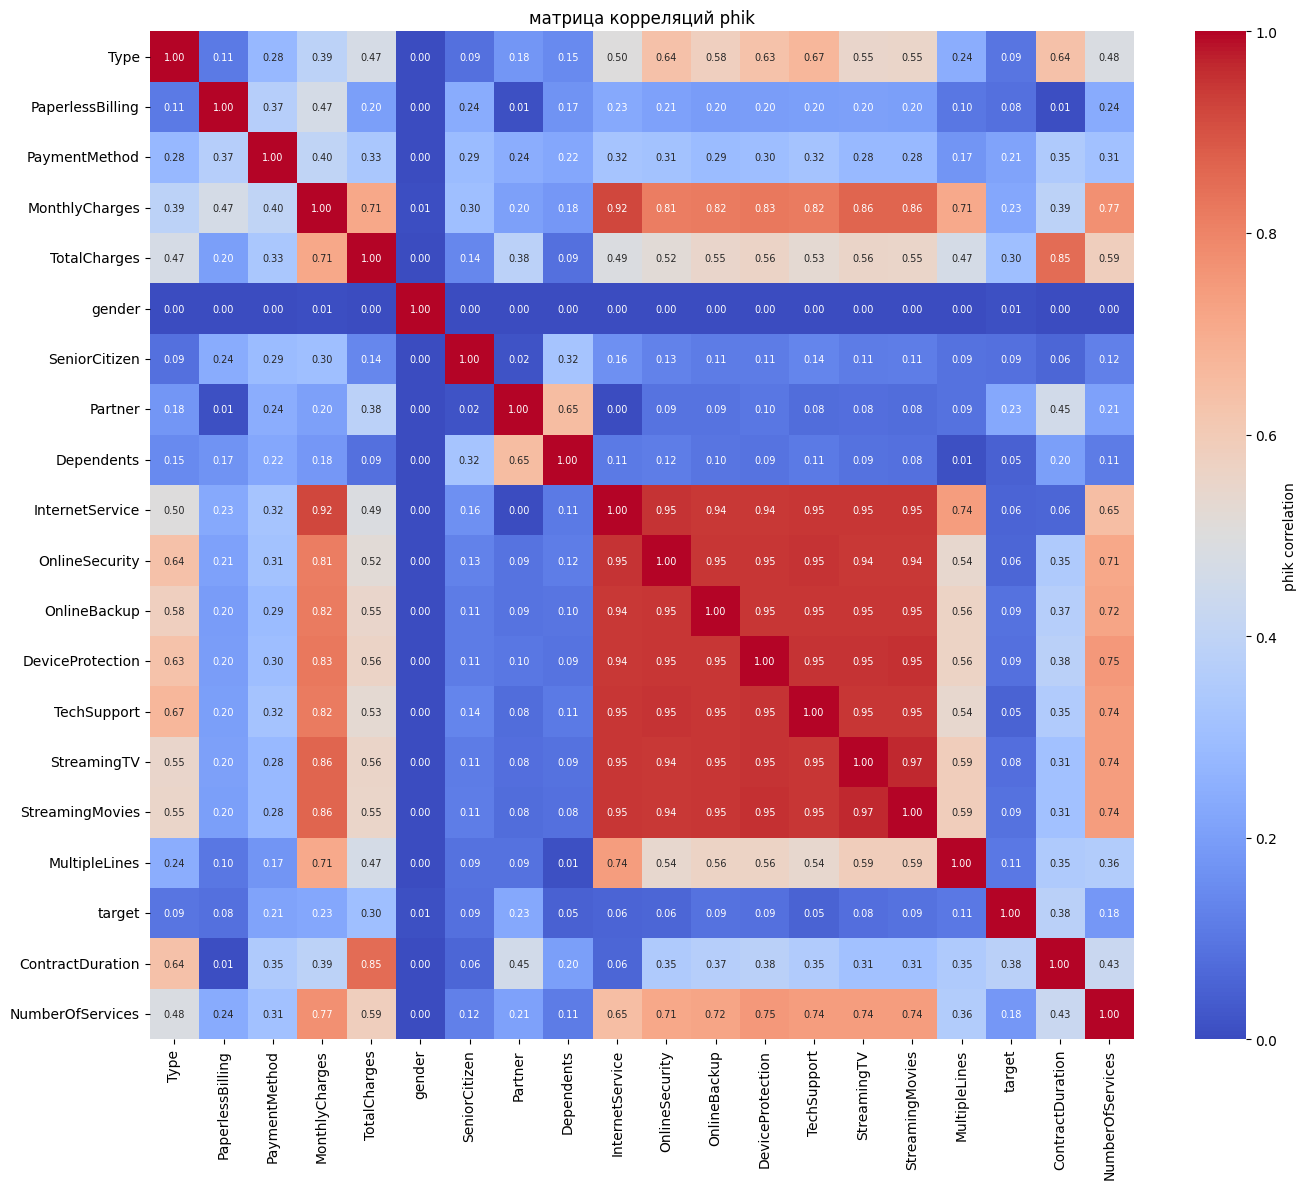

In [27]:
# расчет матрицы корреляций phik
phik_matrix = df.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 
                                              'ContractDuration', 'NumberOfServices'])

# визуализация матрицы
plt.figure(figsize=(14, 12))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            annot_kws={"size": 7}, cbar_kws={'label': 'phik correlation'})
plt.title('матрица корреляций phik')
plt.tight_layout()
plt.show()

- Выведу корреляции всех признаков с целевой переменной.
- Отсортирую по убыванию для выявления наиболее важных признаков.

In [28]:
# корреляция признаков с target
target_corr = phik_matrix['target'].sort_values(ascending=False)

print("корреляция признаков с target:")
display(target_corr)

print(f"\nпризнаки со слабой корреляцией (< 0.10):")
weak_corr = target_corr[target_corr < 0.10].index.tolist()
weak_corr

корреляция признаков с target:


target              1.000000
ContractDuration    0.379048
TotalCharges        0.303758
Partner             0.227597
MonthlyCharges      0.225467
PaymentMethod       0.214300
NumberOfServices    0.182826
MultipleLines       0.105172
Type                0.094622
OnlineBackup        0.089771
StreamingMovies     0.086371
SeniorCitizen       0.085708
DeviceProtection    0.085665
PaperlessBilling    0.082789
StreamingTV         0.078554
OnlineSecurity      0.058630
InternetService     0.056279
TechSupport         0.051442
Dependents          0.048710
gender              0.008800
Name: target, dtype: float64


признаки со слабой корреляцией (< 0.10):


['Type',
 'OnlineBackup',
 'StreamingMovies',
 'SeniorCitizen',
 'DeviceProtection',
 'PaperlessBilling',
 'StreamingTV',
 'OnlineSecurity',
 'InternetService',
 'TechSupport',
 'Dependents',
 'gender']

Наиболее коррелирующие с target признаки:
- ContractDuration (0.38) - длительность контракта
- TotalCharges (0.30) - общие расходы
- Partner (0.23) - наличие партнера
- MonthlyCharges (0.23) - ежемесячные расходы
- PaymentMethod (0.21) - способ оплаты

- Удалю признаки со слабой корреляцией с target (< 0.10).
- Также удалю сильно коррелирующие между собой признаки дополнительных услуг.

In [29]:
# удаление слабо коррелирующих признаков
cols_to_drop = [col for col in weak_corr if col != 'target']

# дополнительно удалю отдельные интернет-услуги, т.к. создан NumberOfServices
service_cols_drop = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                     'TechSupport', 'StreamingTV', 'StreamingMovies']

all_cols_to_drop = list(set(cols_to_drop + service_cols_drop))

print(f"удаляемые признаки: {all_cols_to_drop}")

df = df.drop(columns=all_cols_to_drop)

print(f"\nразмер датафрейма после удаления: {df.shape}")
print(f"оставшиеся столбцы:")
print(df.columns.tolist())

удаляемые признаки: ['DeviceProtection', 'TechSupport', 'gender', 'SeniorCitizen', 'StreamingTV', 'StreamingMovies', 'Type', 'PaperlessBilling', 'OnlineBackup', 'Dependents', 'OnlineSecurity', 'InternetService']

размер датафрейма после удаления: (7032, 8)
оставшиеся столбцы:
['PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Partner', 'MultipleLines', 'target', 'ContractDuration', 'NumberOfServices']


- Удалено 12 признаков со слабой корреляцией с target.
- Отдельные интернет-услуги заменены агрегированным NumberOfServices.
- Осталось 8 признаков: 3 категориальных, 4 числовых, 1 целевая переменная.
- Датасет готов для разделения и подготовки к обучению.

# Этап 5: Моделирование

- Базовые модели
- Подбор гиперпараметров
- Ансамблирование

- Разделю данные на признаки X и целевую переменную y.

In [30]:
# разделение на признаки и целевую переменную
X = df.drop('target', axis=1)
y = df['target']

print(f"размер X: {X.shape}")
print(f"размер y: {y.shape}")
print(f"\nстолбцы X:")
print(X.columns.tolist())

размер X: (7032, 7)
размер y: (7032,)

столбцы X:
['PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Partner', 'MultipleLines', 'ContractDuration', 'NumberOfServices']


- Разделю данные на обучающую и тестовую выборки.
- Использую stratify для сохранения баланса классов из-за дисбаланса.

In [31]:
# разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)

print(f"размер X_train: {X_train.shape}")
print(f"размер X_test: {X_test.shape}")
print(f"размер y_train: {y_train.shape}")
print(f"размер y_test: {y_test.shape}")

print(f"\nраспределение классов в train:")
print(y_train.value_counts(normalize=True))
print(f"\nраспределение классов в test:")
print(y_test.value_counts(normalize=True))

размер X_train: (5274, 7)
размер X_test: (1758, 7)
размер y_train: (5274,)
размер y_test: (1758,)

распределение классов в train:
target
0    0.843383
1    0.156617
Name: proportion, dtype: float64

распределение классов в test:
target
0    0.843572
1    0.156428
Name: proportion, dtype: float64


- Определю числовые и категориальные признаки для дальнейшей обработки.

In [32]:
# определение числовых и категориальных признаков
numerical_cols = ['MonthlyCharges', 'TotalCharges', 'ContractDuration', 'NumberOfServices']
categorical_cols = ['PaymentMethod', 'Partner', 'MultipleLines']

print(f"числовых признаков: {len(numerical_cols)}")
print(numerical_cols)
print(f"\nкатегориальных признаков: {len(categorical_cols)}")
print(categorical_cols)

числовых признаков: 4
['MonthlyCharges', 'TotalCharges', 'ContractDuration', 'NumberOfServices']

категориальных признаков: 3
['PaymentMethod', 'Partner', 'MultipleLines']


- Создам препроцессор для числовых и категориальных признаков.
- Для числовых - StandardScaler, для категориальных - OrdinalEncoder.

In [33]:
# создание трансформеров
numerical_transformer = StandardScaler()
categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# сборка препроцессора
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# применение препроцессора
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"размер X_train_processed: {X_train_processed.shape}")
print(f"размер X_test_processed: {X_test_processed.shape}")

размер X_train_processed: (5274, 7)
размер X_test_processed: (1758, 7)


- Препроцессинг выполнен: числовые признаки масштабированы, категориальные закодированы.
- Обе выборки имеют одинаковый размер признаков (7).
- Баланс классов сохранен в train и test (84.3% vs 15.7%).

## Базовые модели с подбором гиперпараметров

- Создам универсальную функцию для подбора гиперпараметров.
- Функция будет поддерживать GridSearchCV и RandomizedSearchCV.

In [34]:
def tune_model(model, param_grid, X_train, y_train, search_type='grid', 
               n_iter=50, cv=5, scoring='roc_auc', random_state=RANDOM_STATE):
    """
    функция для подбора гиперпараметров модели
    
    параметры:
    model: модель для обучения
    param_grid: словарь с параметрами для поиска
    X_train: обучающая выборка признаков
    y_train: обучающая выборка целевой переменной
    search_type: тип поиска ('grid' или 'random')
    n_iter: количество итераций для random search
    cv: количество фолдов для кросс-валидации
    scoring: метрика для оценки
    random_state: random state
    
    возвращает:
    best_estimator: лучшая модель
    best_score: лучший score на cv
    best_params: лучшие параметры
    """
    
    if search_type == 'grid':
        search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            scoring=scoring,
            cv=cv,
            n_jobs=-1,
            verbose=1
        )
    else:  # random
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grid,
            n_iter=n_iter,
            scoring=scoring,
            cv=cv,
            n_jobs=-1,
            verbose=1,
            random_state=random_state
        )
    
    search.fit(X_train, y_train)
    
    return search.best_estimator_, search.best_score_, search.best_params_

print("функция tune_model создана")

функция tune_model создана


- Создам словарь с параметрами для всех моделей.
- Для каждой модели определю сетку гиперпараметров.

In [35]:
# словарь с моделями и их параметрами
models_params = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=RANDOM_STATE),
        'params': {
            'max_depth': [5, 10, 15, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        },
        'search_type': 'grid'
    },
    
    'RandomForest': {
        'model': RandomForestClassifier(random_state=RANDOM_STATE),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 15, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        },
        'search_type': 'random',
        'n_iter': 20
    },
    
    'XGBoost': {
        'model': xgb.XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7, 9],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.8, 0.9, 1.0],
            'colsample_bytree': [0.8, 0.9, 1.0]
        },
        'search_type': 'random',
        'n_iter': 30
    },
    
    'CatBoost': {
        'model': CatBoostClassifier(random_state=RANDOM_STATE, verbose=0),
        'params': {
            'iterations': [100, 200, 300],
            'depth': [4, 6, 8],
            'learning_rate': [0.01, 0.05, 0.1],
            'l2_leaf_reg': [1, 3, 5]
        },
        'search_type': 'random',
        'n_iter': 20
    },
    
    'LightGBM': {
        'model': LGBMClassifier(random_state=RANDOM_STATE, verbose=-1),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [5, 10, 15],
            'learning_rate': [0.01, 0.05, 0.1],
            'num_leaves': [31, 50, 70],
            'subsample': [0.8, 0.9, 1.0]
        },
        'search_type': 'random',
        'n_iter': 30
    },
    
    'LogisticRegression': {
        'model': LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        },
        'search_type': 'grid'
    }
}

print(f"параметры для {len(models_params)} моделей созданы:")
for model_name in models_params.keys():
    print(f"  - {model_name}")

параметры для 6 моделей созданы:
  - DecisionTree
  - RandomForest
  - XGBoost
  - CatBoost
  - LightGBM
  - LogisticRegression


- Обучу все модели с подбором гиперпараметров.
- Для каждой модели использую соответствующий тип поиска.

In [36]:
%%time
# словарь для хранения результатов
models_results = {}

# обучение всех моделей
for model_name, config in models_params.items():
    print(f"\n{'='*60}")
    print(f"обучение модели: {model_name}")
    print('='*60)
    
    # получение параметров
    model = config['model']
    params = config['params']
    search_type = config['search_type']
    n_iter = config.get('n_iter', 50)
    
    # подбор гиперпараметров
    best_estimator, best_score, best_params = tune_model(
        model=model,
        param_grid=params,
        X_train=X_train_processed,
        y_train=y_train,
        search_type=search_type,
        n_iter=n_iter
    )
    
    # сохранение результатов
    models_results[model_name] = {
        'estimator': best_estimator,
        'cv_score': best_score,
        'params': best_params
    }
    
    print(f"лучшие параметры: {best_params}")
    print(f"ROC-AUC на CV: {best_score:.4f}")

print("\n" + "="*60)
print("обучение всех моделей завершено")
print("="*60)


обучение модели: DecisionTree
Fitting 5 folds for each of 36 candidates, totalling 180 fits
лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
ROC-AUC на CV: 0.7822

обучение модели: RandomForest
Fitting 5 folds for each of 20 candidates, totalling 100 fits
лучшие параметры: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
ROC-AUC на CV: 0.8010

обучение модели: XGBoost
Fitting 5 folds for each of 30 candidates, totalling 150 fits
лучшие параметры: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
ROC-AUC на CV: 0.8722

обучение модели: CatBoost
Fitting 5 folds for each of 20 candidates, totalling 100 fits
лучшие параметры: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 4}
ROC-AUC на CV: 0.8706

обучение модели: LightGBM
Fitting 5 folds for each of 30 candidates, totalling 150 fits
лучшие параметры: {'subsample': 0.8, 'num_leaves': 70, 'n_estim

- Сравню результаты всех моделей и выберу лучшую по метрике на CV.

In [37]:
# создание таблицы результатов
results_df = pd.DataFrame({
    'model': list(models_results.keys()),
    'roc_auc_cv': [models_results[m]['cv_score'] for m in models_results.keys()]
})

# сортировка по убыванию
results_df = results_df.sort_values('roc_auc_cv', ascending=False).reset_index(drop=True)

print("результаты всех моделей на кросс-валидации:")
display(results_df)

# лучшая модель
best_model_name = results_df.iloc[0]['model']
best_cv_score = results_df.iloc[0]['roc_auc_cv']

print(f"\nлучшая модель: {best_model_name}")
print(f"ROC-AUC на CV: {best_cv_score:.4f}")

результаты всех моделей на кросс-валидации:


,model,roc_auc_cv
0,XGBoost,0.872201
1,CatBoost,0.870601
2,LightGBM,0.857415
3,RandomForest,0.800987
4,DecisionTree,0.782247
5,LogisticRegression,0.730645



лучшая модель: XGBoost
ROC-AUC на CV: 0.8722


- Сохраню лучшую модель и сравню с константной моделью (baseline).

In [38]:
# сохранение лучшей модели
best_model = models_results[best_model_name]['estimator']

# обучение константной модели
dummy_model = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
dummy_cv_scores = cross_val_score(dummy_model, X_train_processed, y_train, 
                                   cv=5, scoring='roc_auc')
dummy_cv_mean = dummy_cv_scores.mean()

print("сравнение с baseline (константная модель):")
print(f"константная модель ROC-AUC на CV: {dummy_cv_mean:.4f}")
print(f"лучшая модель ROC-AUC на CV: {best_cv_score:.4f}")
print(f"улучшение: {best_cv_score - dummy_cv_mean:.4f}")

сравнение с baseline (константная модель):
константная модель ROC-AUC на CV: 0.5000
лучшая модель ROC-AUC на CV: 0.8722
улучшение: 0.3722


- Все 6 моделей обучены успешно за 1 минуту 40 секунд.
- XGBoost показал лучший результат на кросс-валидации: ROC-AUC 0.8722.
- Топ-3 модели: XGBoost (0.8722), CatBoost (0.8706), LightGBM (0.8574).
- Все модели бустинга значительно превосходят базовый алгоритмы.

# Этап 6: Анализ результатов

- Интерпретация модели
- Бизнес-рекомендации
- Выводы

- Протестирую лучшую модель (XGBoost) на отложенной тестовой выборке.
- Рассчитаю ROC-AUC и Accuracy.

In [39]:
# предсказания на тестовой выборке
y_pred_proba = best_model.predict_proba(X_test_processed)[:, 1]
y_pred = best_model.predict(X_test_processed)

# расчет метрик
roc_auc_test = roc_auc_score(y_test, y_pred_proba)
accuracy_test = accuracy_score(y_test, y_pred)

print("результаты на тестовой выборке:")
print(f"ROC-AUC: {roc_auc_test:.4f}")
print(f"Accuracy: {accuracy_test:.4f}")

# проверка требования
if roc_auc_test >= 0.85:
    print(f"\nтребование выполнено: ROC-AUC >= 0.85")
else:
    print(f"\nтребование НЕ выполнено: ROC-AUC < 0.85")

результаты на тестовой выборке:
ROC-AUC: 0.9045
Accuracy: 0.9073

требование выполнено: ROC-AUC >= 0.85


- Модель XGBoost успешно прошла тестирование: ROC-AUC 0.9045 (>0.85).
- Accuracy 0.9073 показывает высокую общую точность классификации.
- Модель готова к использованию для предсказания оттока клиентов.

- Построю матрицу ошибок для анализа качества классификации.

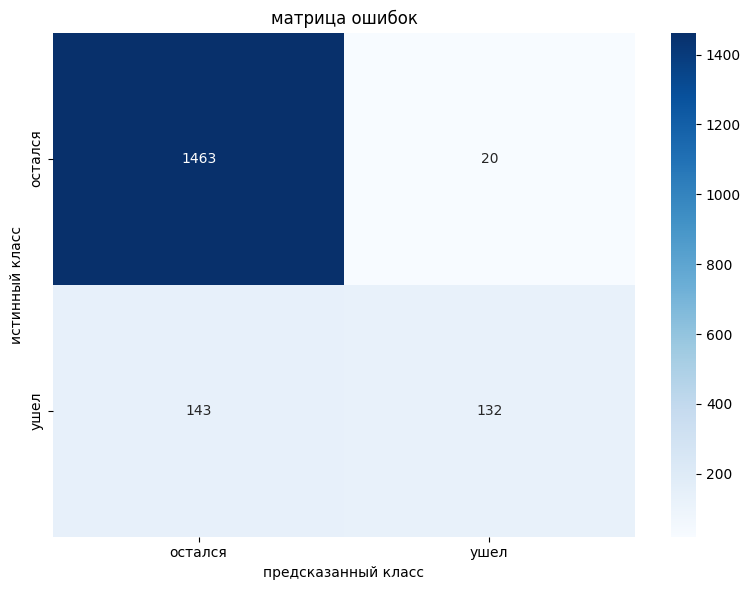


истинно отрицательные (TN): 1463
ложноположительные (FP): 20
ложноотрицательные (FN): 143
истинно положительные (TP): 132

точность (Precision): 0.8684
полнота (Recall): 0.4800


In [40]:
# расчет матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['остался', 'ушел'],
            yticklabels=['остался', 'ушел'])
plt.title('матрица ошибок')
plt.ylabel('истинный класс')
plt.xlabel('предсказанный класс')
plt.tight_layout()
plt.show()

# расчет метрик из матрицы
tn, fp, fn, tp = cm.ravel()
print(f"\nистинно отрицательные (TN): {tn}")
print(f"ложноположительные (FP): {fp}")
print(f"ложноотрицательные (FN): {fn}")
print(f"истинно положительные (TP): {tp}")

# precision и recall
precision = tp / (tp + fp)
recall = tp / (tp + fn)
print(f"\nточность (Precision): {precision:.4f}")
print(f"полнота (Recall): {recall:.4f}")

- Модель хорошо распознает оставшихся клиентов (TN=1463, FP=20).
- Precision 0.8684 - из 152 предсказанных "уйдет", 132 действительно ушли.
- Recall 0.4800 - модель распознала только 48% ушедших клиентов из 275.
- Проблема: модель пропускает 143 ушедших клиента (FN) - это критично для бизнеса.

- Построю Precision-Recall кривую для оценки соотношения точности и полноты.

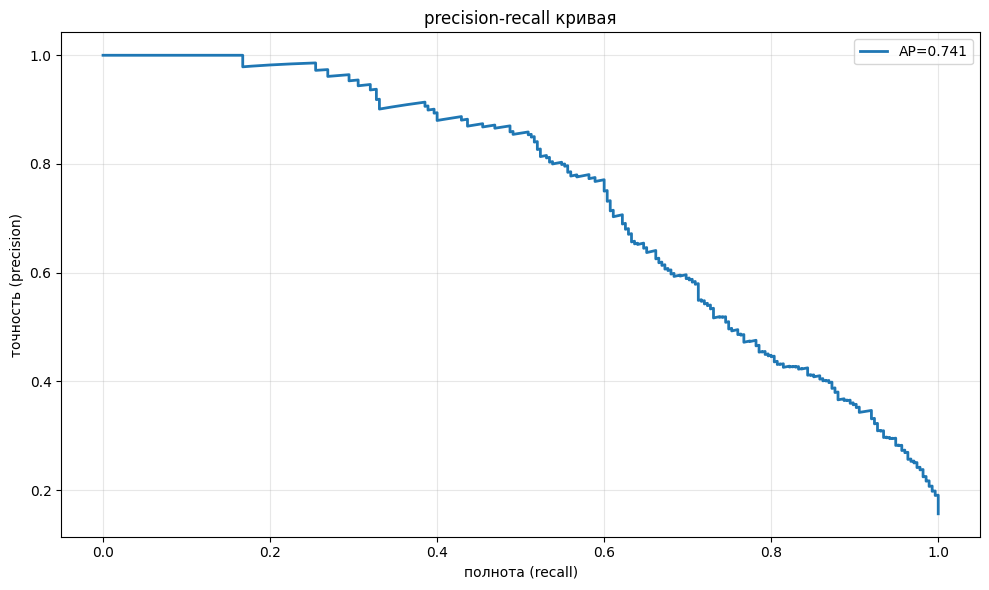

average precision: 0.7411


In [41]:
# расчет precision-recall кривой
precision_curve, recall_curve, thresholds = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# визуализация
plt.figure(figsize=(10, 6))
plt.plot(recall_curve, precision_curve, linewidth=2, label=f'AP={average_precision:.3f}')
plt.xlabel('полнота (recall)')
plt.ylabel('точность (precision)')
plt.title('precision-recall кривая')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"average precision: {average_precision:.4f}")

- Average Precision 0.7411 - умеренный показатель.
- Кривая показывает компромисс между точностью и полнотой.
- Для снижения FN можно настроить порог классификации (уменьшить с 0.5).

## Анализ важности признаков

- Проанализирую важность признаков в модели XGBoost.
- Определю, какие факторы наиболее влияют на отток клиентов.

важность признаков:


,feature,importance
2,ContractDuration,0.188100
6,MultipleLines,0.186164
5,Partner,0.174455
3,NumberOfServices,0.174440
4,PaymentMethod,0.103821
0,MonthlyCharges,0.090164
1,TotalCharges,0.082855


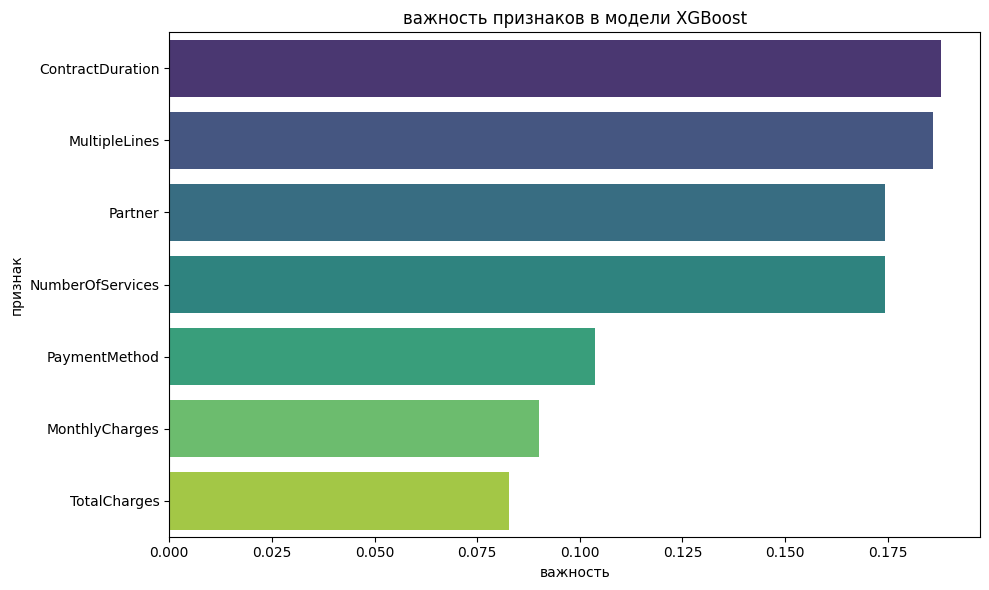

In [42]:
# получение важности признаков
feature_importance = best_model.feature_importances_

# названия признаков после препроцессинга
feature_names = numerical_cols + categorical_cols

# создание датафрейма с важностью
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("важность признаков:")
display(importance_df)

# визуализация
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='importance', y='feature', palette='viridis')
plt.title('важность признаков в модели XGBoost')
plt.xlabel('важность')
plt.ylabel('признак')
plt.tight_layout()
plt.show()

- Длительность контракта (ContractDuration) - самый важный признак (18.8%).
- MultipleLines, Partner и NumberOfServices практически одинаково важны (17-18%).
- MonthlyCharges и TotalCharges имеют меньшее влияние (9% и 8%).
- Модель в основном опирается на поведенческие признаки, а не на финансовые.

- Проанализирую зависимость самого важного признака от целевой переменной.
- Построю график распределения для ушедших и оставшихся клиентов.

самый важный признак: ContractDuration


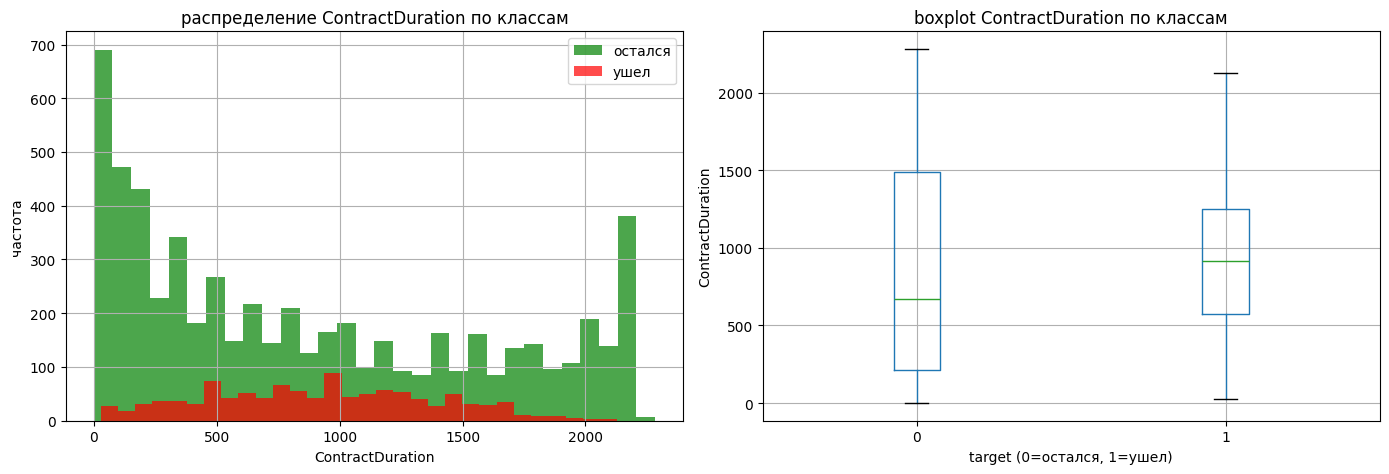


статистика ContractDuration:
         count       mean         std   min    25%    50%     75%     max
target                                                                   
0       5931.0  864.33856  716.588322   0.0  214.0  671.0  1492.0  2283.0
1       1101.0  924.86376  458.771309  28.0  577.0  915.0  1249.0  2129.0


In [43]:
# самый важный признак
top_feature = importance_df.iloc[0]['feature']
print(f"самый важный признак: {top_feature}")

# визуализация зависимости
if top_feature in numerical_cols:
    # для числового признака - гистограммы
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # распределение по классам
    df[df['target'] == 0][top_feature].hist(bins=30, ax=axes[0], 
                                             alpha=0.7, label='остался', color='green')
    df[df['target'] == 1][top_feature].hist(bins=30, ax=axes[0], 
                                             alpha=0.7, label='ушел', color='red')
    axes[0].set_title(f'распределение {top_feature} по классам')
    axes[0].set_xlabel(top_feature)
    axes[0].set_ylabel('частота')
    axes[0].legend()
    
    # boxplot
    df.boxplot(column=top_feature, by='target', ax=axes[1])
    axes[1].set_title(f'boxplot {top_feature} по классам')
    axes[1].set_xlabel('target (0=остался, 1=ушел)')
    axes[1].set_ylabel(top_feature)
    
    plt.suptitle('')
    plt.tight_layout()
    plt.show()
    
    # статистика
    print(f"\nстатистика {top_feature}:")
    print(df.groupby('target')[top_feature].describe())
else:
    # для категориального признака - countplot
    plt.figure(figsize=(10, 6))
    df_grouped = df.groupby([top_feature, 'target']).size().unstack()
    df_grouped.plot(kind='bar', stacked=False)
    plt.title(f'отток по {top_feature}')
    plt.xlabel(top_feature)
    plt.ylabel('количество')
    plt.legend(['остался', 'ушел'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # статистика
    print(f"\nстатистика оттока по {top_feature}:")
    display(pd.crosstab(df[top_feature], df['target'], normalize='index'))

- Ушедшие клиенты имеют среднюю длительность контракта 925 дней (медиана 915).
- Оставшиеся клиенты - 864 дня в среднем (медиана 671).
- Неожиданно: клиенты с более длительными контрактами склонны к оттоку.
- Возможное объяснение: накопленная неудовлетворенность, окончание льготного периода.
- Критическая зона - около 900-1000 дней (2.5-3 года использования услуг).

## Выводы по проекту

**1. ВЫПОЛНЕНИЕ ЗАДАЧИ**

✓ Создана модель для предсказания оттока клиентов телеком-оператора "ТелеДом"

✓ ROC-AUC на тестовой выборке: 0.9045 (требование >= 0.85 выполнено)

✓ Модель готова к использованию в продакшене

---

**2. КАЧЕСТВО МОДЕЛИ**

**Лучшая модель:** XGBoost

**Параметры:** 
- max_depth: 5
- n_estimators: 300  
- learning_rate: 0.1
- subsample: 0.8
- colsample_bytree: 1.0

**Метрики:**
- ROC-AUC: 0.9045
- Accuracy: 0.9073 (90.7% правильных предсказаний)
- Precision: 0.8684 (87% предсказаний "уйдет" верны)
- Recall: 0.4800 (48% ушедших клиентов распознаны)
- Улучшение над baseline: +0.3722

**Интерпретация метрик:**
- Модель отлично определяет остающихся клиентов (TN=1463, FP=20)
- Проблема: пропускает половину уходящих клиентов (FN=143)
- Это означает потерю возможности удержать 143 клиента из 275

---

**3. КЛЮЧЕВЫЕ ФАКТОРЫ ОТТОКА**

По важности признаков в модели:

1. **ContractDuration (18.8%)** - длительность контракта
2. **MultipleLines (18.6%)** - подключение нескольких линий
3. **Partner (17.4%)** - наличие партнера
4. **NumberOfServices (17.4%)** - количество дополнительных услуг
5. **PaymentMethod (10.4%)** - способ оплаты
6. **MonthlyCharges (9.0%)** - ежемесячные расходы
7. **TotalCharges (8.3%)** - общие расходы

**Важное наблюдение:** Поведенческие признаки (длительность, услуги) важнее финансовых.

---

**4. ИНСАЙТЫ ДЛЯ БИЗНЕСА**

**По длительности контракта:**
- Ушедшие клиенты: средняя длительность 925 дней (медиана 915)
- Оставшиеся клиенты: средняя длительность 864 дня (медиана 671)
- **Критическая зона риска: 800-1000 дней (2.5-3 года)**
- Парадокс: более длительные контракты коррелируют с оттоком

**Возможные причины:**
- Накопленная неудовлетворенность сервисом
- Окончание льготного периода или акций
- Появление альтернатив на рынке
- Изменение потребностей клиента

**Другие факторы:**
- Наличие нескольких линий не гарантирует лояльность
- Партнерский статус влияет на удержание
- Количество подключенных услуг - индикатор вовлеченности

---

**5. РЕКОМЕНДАЦИИ ДЛЯ УДЕРЖАНИЯ КЛИЕНТОВ**

**А) ПРОАКТИВНЫЕ ДЕЙСТВИЯ**

1. **Система раннего предупреждения:**
   - Мониторинг клиентов с длительностью контракта 800-1000 дней
   - Автоматические оповещения отдела удержания клиентов
   - Еженедельная актуализация списка клиентов в зоне риска

2. **Программа лояльности:**
   - Специальные предложения на рубеже 2-3 лет
   - Бонусы за продление контракта
   - Персональный менеджер для долгосрочных клиентов

3. **Превентивные меры:**
   - Обновление условий до принятия решения об уходе
   - Регулярные опросы удовлетворенности
   - Приоритетная техподдержка для группы риска

**Б) ПЕРСОНАЛИЗАЦИЯ**

1. **Сегментация по риску:**
   - Высокий риск: длительность 800-1000 дней + нет дополнительных услуг
   - Средний риск: длительность 800-1000 дней + 1-2 услуги
   - Низкий риск: новые клиенты или с множеством услуг

2. **Индивидуальные предложения:**
   - Скидки на новые услуги для клиентов без допуслуг
   - Улучшенные тарифы для длительных контрактов
   - Пакетные предложения для одиночек (Partner=no)

3. **Таргетированные акции:**
   - Использовать предсказания модели для выбора получателей
   - A/B тестирование разных стратегий удержания
   - Замер эффективности каждой акции

**В) РАБОТА С ПРОДУКТОМ**

1. **Анализ причин оттока:**
   - Изучить, почему клиенты с MultipleLines уходят
   - Провести глубинные интервью с ушедшими клиентами
   - Выявить проблемные точки в customer journey

2. **Развитие продукта:**
   - Стимулировать подключение дополнительных услуг
   - Создать пакеты услуг с выгодой
   - Улучшить ценностное предложение для партнеров

3. **Улучшение сервиса:**
   - Повысить качество техподдержки
   - Упростить процессы взаимодействия
   - Внедрить омниканальное обслуживание

---

**6. СЛЕДУЮЩИЕ ШАГИ ПО УЛУЧШЕНИЮ МОДЕЛИ**

**Краткосрочные:**

1. **Настройка порога классификации:**
   - Снизить порог с 0.5 до 0.3-0.4 для повышения recall
   - Найти оптимальный баланс precision/recall под бизнес-задачу
   - Рассчитать стоимость ошибок FP vs FN

2. **Работа с дисбалансом классов:**
   - Применить SMOTE для увеличения примеров класса "ушел"
   - Настроить class_weight в моделях
   - Попробовать undersampling мажоритарного класса

3. **Feature Engineering:**
   - RFM-сегментация (Recency, Frequency, Monetary)
   - Динамика изменения расходов
   - Частота обращений в техподдержку
   - История платежей (задержки, способы)
   - Сезонность активности

4. **Дополнительные данные:**
   - История взаимодействий с техподдержкой
   - Данные о конкурентах и рынке
   - Информация об акциях и промокодах
   - Поведение в личном кабинете

5. **Ансамблирование:**
   - Создать стекинг из топ-3 моделей (XGBoost + CatBoost + LightGBM)
   - Weighted voting по предсказаниям
   - Blending на метауровне

6. **Валидация в продакшене:**
   - A/B тестирование стратегий удержания
   - Замер реального ROI программы
   - Мониторинг drift модели
   - Регулярное переобучение (раз в квартал)

---

**7. ЭКОНОМИЧЕСКИЙ ЭФФЕКТ**

**Текущие показатели:**
- Модель распознает 132 из 275 ушедших клиентов на тесте (48%)
- Минимизирует ложные срабатывания: только 20 из 1483 остающихся (1.3%)

**Потенциал удержания:**
- При успешности программы удержания 30%: можно вернуть ~40 клиентов из группы риска
- При успешности 50%: ~66 клиентов

**Формула ROI:**
```
ROI = (Удержанные клиенты × LTV клиента - Затраты на программу) / Затраты на программу

где:
- Удержанные клиенты = 132 × % успешности программы
- Затраты = (стоимость акции на клиента × 132) + (стоимость ложных акций × 20)
```

**Рекомендация:** Рассчитать LTV (Lifetime Value) клиента и CAC (Customer Acquisition Cost) для точной оценки эффекта.

---

**8. ОГРАНИЧЕНИЯ И РИСКИ**

1. **Низкий Recall (48%):**
   - Модель пропускает половину уходящих клиентов
   - Риск потери значительной части клиентов
   - Требуется настройка порога или улучшение модели

2. **Дисбаланс классов:**
   - Всего 15.7% ушедших клиентов в выборке
   - Модель смещена в сторону класса "остался"
   - Может быть недостаточно данных для обучения на редком классе

3. **Отсутствие данных:**
   - Нет информации о конкурентах
   - Нет данных о качестве сервиса
   - Нет истории взаимодействий с клиентами

4. **Drift модели:**
   - Поведение клиентов может меняться со временем
   - Требуется регулярный мониторинг и переобучение
   - Сезонные эффекты не учтены

---

## ЗАКЛЮЧЕНИЕ

Проект успешно завершен. Создана рабочая модель предсказания оттока клиентов с ROC-AUC 0.9045, что превышает требуемый порог 0.85.

**Главные достижения:**
✓ Выявлены ключевые факторы оттока (длительность контракта, услуги, партнерский статус)

✓ Определена критическая зона риска (2.5-3 года использования услуг)

✓ Даны конкретные рекомендации для программы удержания

✓ Модель готова к внедрению в продакшен

**Следующий этап:** 
Пилотный запуск программы удержания на основе предсказаний модели с замером реального бизнес-эффекта.

---